1. Importing all required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import warnings
warnings.filterwarnings("ignore")


2. Data gathering

In [2]:
df= pd.read_csv("LoanApprovalPrediction.csv")

3. Exploratory data analysis

In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,Y
3,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0.0,Not Graduate,No,2333,1516.0,95,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,LP002964,Male,Yes,2.0,Not Graduate,No,3987,1411.0,157,360.0,1.0,Rural,Y
453,LP002974,Male,Yes,0.0,Graduate,No,3232,1950.0,108,360.0,1.0,Rural,Y
454,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71,360.0,1.0,Rural,Y
455,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187,360.0,1.0,Urban,Y


In [4]:
df1=df

In [5]:
df1.to_csv("LoanApprovalPrediction1.csv")

In [6]:
df1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,Y
3,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0.0,Not Graduate,No,2333,1516.0,95,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,LP002964,Male,Yes,2.0,Not Graduate,No,3987,1411.0,157,360.0,1.0,Rural,Y
453,LP002974,Male,Yes,0.0,Graduate,No,3232,1950.0,108,360.0,1.0,Rural,Y
454,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71,360.0,1.0,Rural,Y
455,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187,360.0,1.0,Urban,Y


In [7]:
df1.info() # it gives information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            457 non-null    object 
 1   Gender             457 non-null    object 
 2   Married            457 non-null    object 
 3   Dependents         446 non-null    float64
 4   Education          457 non-null    object 
 5   Self_Employed      449 non-null    object 
 6   ApplicantIncome    457 non-null    int64  
 7   CoapplicantIncome  457 non-null    float64
 8   LoanAmount         457 non-null    int64  
 9   Loan_Amount_Term   443 non-null    float64
 10  Credit_History     418 non-null    float64
 11  Property_Area      457 non-null    object 
 12  Loan_Status        457 non-null    object 
dtypes: float64(4), int64(2), object(7)
memory usage: 46.5+ KB


In [8]:
df1.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           11
Education             0
Self_Employed         8
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       39
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

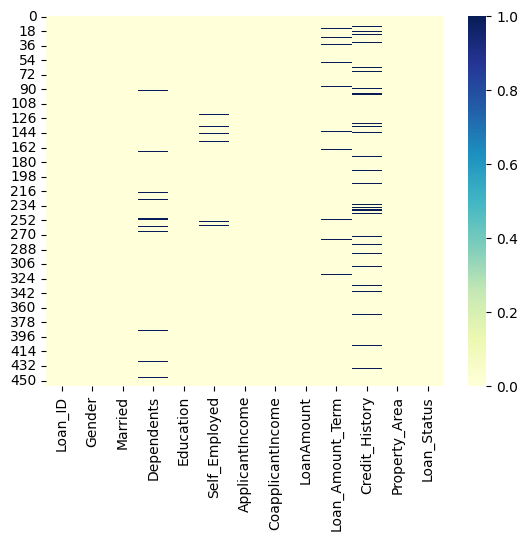

In [9]:
sns.heatmap(df1.isna(),  cmap ="YlGnBu")

In [10]:
df1.nunique()

Loan_ID              457
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      376
CoapplicantIncome    241
LoanAmount           127
Loan_Amount_Term       9
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

### deleting loan id column

In [11]:
df1.drop("Loan_ID", inplace=True, axis=1)

In [12]:
## coverting categorical data to numerical fomr

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for col in df1.select_dtypes(include=['object']).columns:
    df1[col]=le.fit_transform(df1[col])

df1["Gender"].value_counts()
df1["Gender"].replace({"Male":0, "Female":1}, inplace=True)
df1["Married"].value_counts()
df1["Married"].replace({"Yes":1, "No":0}, inplace=True)
df1["Education"].value_counts()
df1["Education"].replace({"Graduate":1, "Not Graduate":0}, inplace=True)
df1["Self_Employed"].value_counts()
df1["Self_Employed"].replace({"Yes":1, "No":0}, inplace=True)
df1["Property_Area"].value_counts()
df2=pd.get_dummies(df1["Property_Area"], dtype=int)
df3=pd.concat([df1, df2], axis=1)

In [13]:
df1.drop("Property_Area", axis=1, inplace=True)

In [14]:
df1.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,457.000000,457.000000,446.000000,457.000000,457.000000,457.000000,457.000000,457.000000,443.000000,418.000000,457.000000
mean,0.805252,0.634573,0.708520,0.258206,0.185996,3764.347921,1555.065470,122.531729,343.611738,0.837321,0.702407
std,0.396441,0.482077,0.992226,0.438127,0.432228,1437.039477,2344.023155,35.758872,65.549905,0.369515,0.457701
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,47.000000,12.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2698.000000,0.000000,100.000000,360.000000,1.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3481.000000,1430.000000,120.000000,360.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,0.000000,4600.000000,2330.000000,144.000000,360.000000,1.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,2.000000,8000.000000,33837.000000,209.000000,480.000000,1.000000,1.000000


In [15]:
### coapplicant's income 33837.000000 is possible an outlier

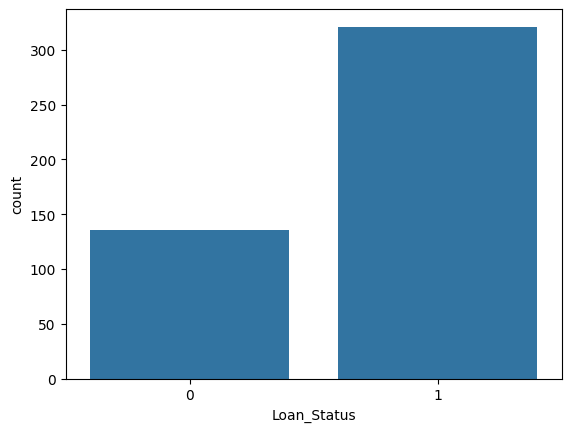

In [16]:
sns.countplot(x=df1["Loan_Status"])
plt.savefig("Correlation.png")

In [17]:
df1.isna().sum()

Gender                0
Married               0
Dependents           11
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       39
Loan_Status           0
dtype: int64

In [18]:
df1["Dependents"].median()
df1["Dependents"].fillna(df1["Dependents"].median(), inplace=True)   
df1["Self_Employed"].median()
df1["Self_Employed"].fillna(df1["Self_Employed"].median(),inplace=True)
df1["Loan_Amount_Term"].median()
df1["Loan_Amount_Term"].fillna(df1["Loan_Amount_Term"].median(), inplace=True)
df1["Credit_History"].median()
df1["Credit_History"].fillna(df1["Credit_History"].median(), inplace=True)

In [19]:
df1.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Loan_Status          0
dtype: int64

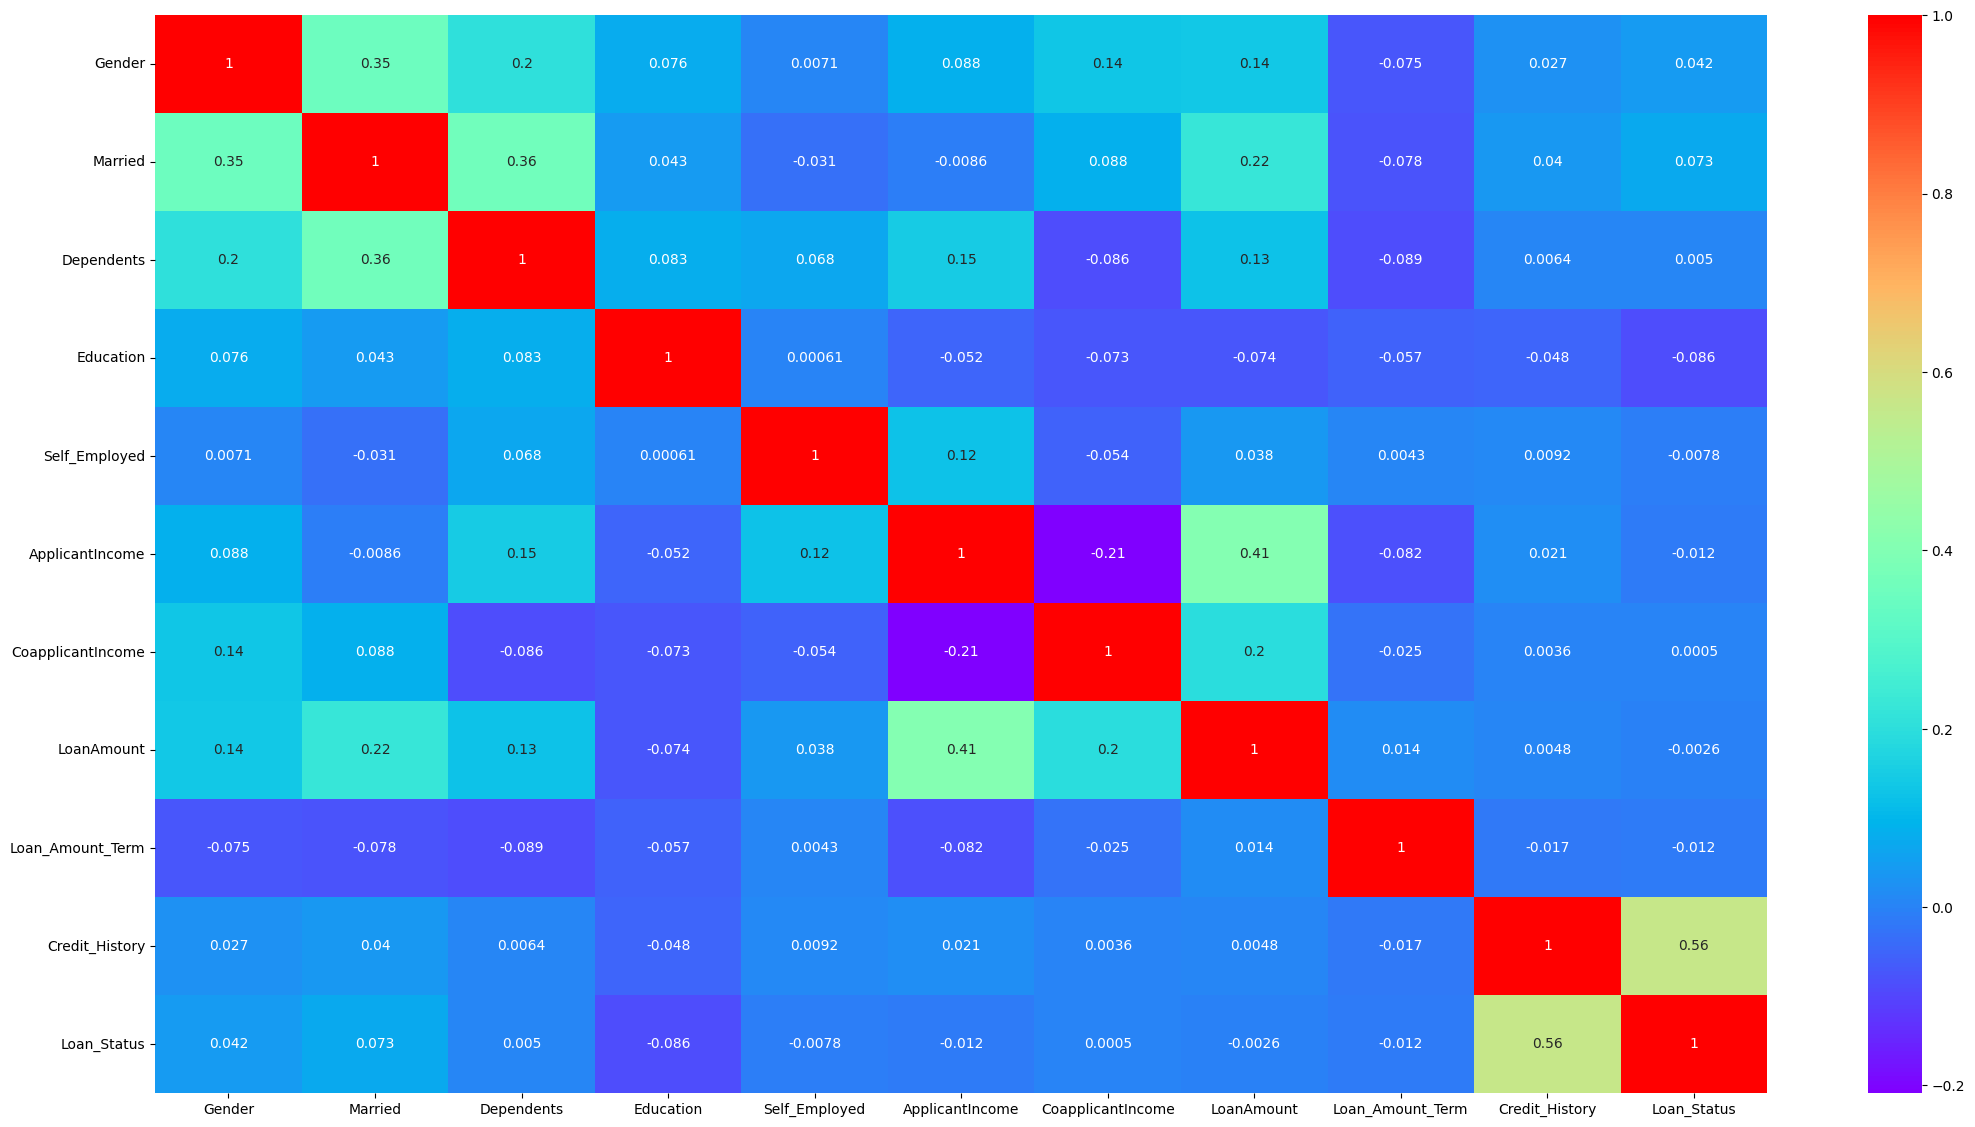

In [20]:
plt.figure(figsize=(26,14))
sns.heatmap(df1.corr(),annot = True, cmap = "rainbow")
plt.savefig("Correlation.png")

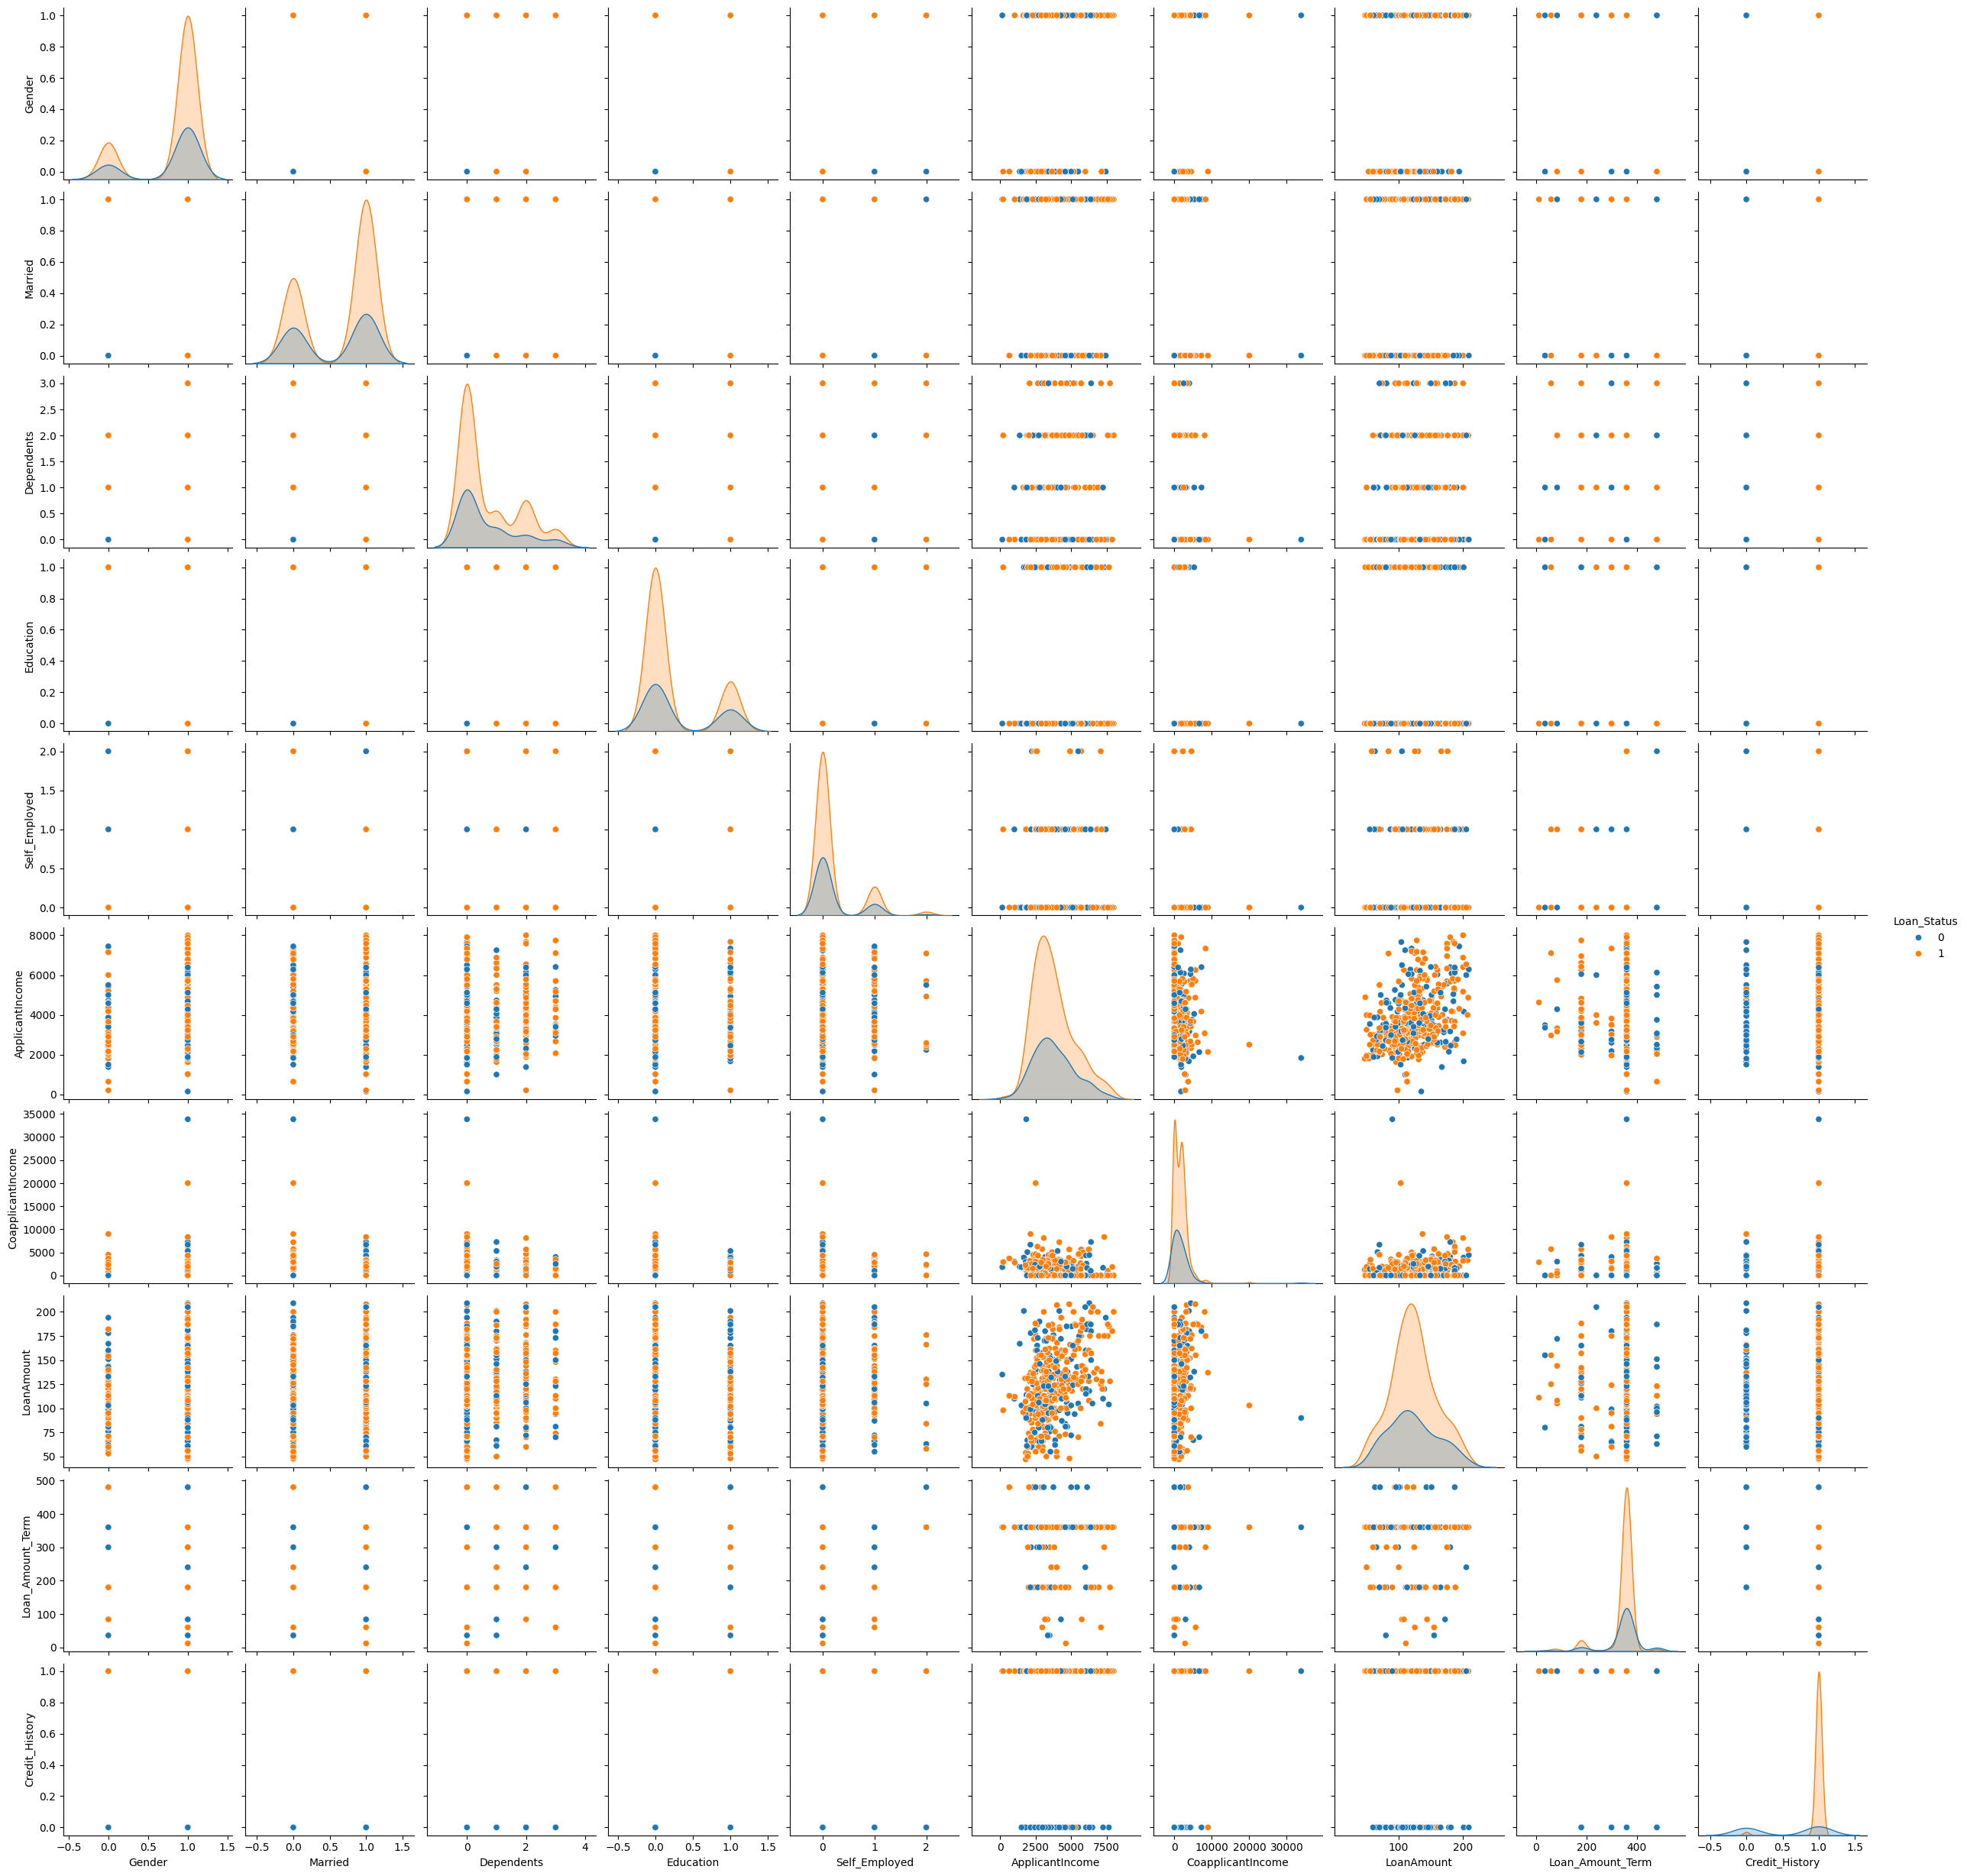

In [21]:
##paidplot

sns.pairplot(df1, hue="Loan_Status")
plt.savefig("pairplot.png")

In [22]:
df1.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000
mean,0.805252,0.634573,0.691466,0.258206,0.185996,3764.347921,1555.065470,122.531729,344.113786,0.851204,0.702407
std,0.396441,0.482077,0.986195,0.438127,0.432228,1437.039477,2344.023155,35.758872,64.597711,0.356278,0.457701
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,47.000000,12.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2698.000000,0.000000,100.000000,360.000000,1.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3481.000000,1430.000000,120.000000,360.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,0.000000,4600.000000,2330.000000,144.000000,360.000000,1.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,2.000000,8000.000000,33837.000000,209.000000,480.000000,1.000000,1.000000


In [23]:
#sns.boxplot(x=df3['CoapplicantIncome'])
#plt.show()

In [24]:
##Q3 = df3['CoapplicantIncome'].quantile(0.75)
##IQR = Q3 - Q1

##lower_tail = Q1 - 1.5 * IQR
##upper_tail = Q3 + 1.5 * IQR
##df3.loc[(df3["CoapplicantIncome"]>upper_tail)]=upper_tail
##df3.loc[(df3["CoapplicantIncome"]<lower_tail)]=lower_tail


In [25]:
#sns.boxplot(x=df3['CoapplicantIncome'])
#plt.show()

In [26]:
df1["Loan_Status"].value_counts()   ##### error

Loan_Status
1    321
0    136
Name: count, dtype: int64

# Feature selection

In [27]:
x=df1.drop("Loan_Status", axis=1)
y=df1["Loan_Status"]

In [28]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=1, stratify=y)

In [29]:
##Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [30]:
#def model_evaluation(actual,pred):
###accuracy = accuracy_score(actual,pred)
###print(f"Accuracy_score:{accuracy}")
####cnf_matrix = confusion_matrix(actual,pred)
###print(f"Confusion_matrix:\n{cnf_matrix}")
###clf_report= classification_report(actual,pred)
###print(f"Classification_report:\n{clf_report}")
###recallscore=recall_score(actual,pred)
###print(f"Recallscore:{recallscore}")

In [31]:
models={"Logistic Regression":LogisticRegression(),
        "Random_forest_model" :RandomForestClassifier(),}  # creating instance of the Random forest model


In [32]:
for name, model in models.items():
    model.fit(x_train, y_train)
    pred_test=model.predict(x_test)
    pred_train=model.predict(x_train)
    print("\n")
    print("Testing report")
    print(f"\n{name}")
    accuracy = accuracy_score(y_test,pred_test)
    print(f"Accuracy_score:{accuracy}")
    clf_report= classification_report(y_test,pred_test)
    print(f"Classification_report:\n{clf_report}")
    recallscore=recall_score(y_test,pred_test)
    print(f"Recallscore:{recallscore}")







Testing report

Logistic Regression
Accuracy_score:0.8478260869565217
Classification_report:
              precision    recall  f1-score   support

           0       1.00      0.48      0.65        27
           1       0.82      1.00      0.90        65

    accuracy                           0.85        92
   macro avg       0.91      0.74      0.78        92
weighted avg       0.87      0.85      0.83        92

Recallscore:1.0


Testing report

Random_forest_model
Accuracy_score:0.8260869565217391
Classification_report:
              precision    recall  f1-score   support

           0       0.82      0.52      0.64        27
           1       0.83      0.95      0.89        65

    accuracy                           0.83        92
   macro avg       0.83      0.74      0.76        92
weighted avg       0.83      0.83      0.81        92

Recallscore:0.9538461538461539


In [33]:
for name, model in models.items():
    model.fit(x_train, y_train)
    pred_test=model.predict(x_test)
    pred_train=model.predict(x_train)
    print("\n")
    print("Training report")
    print(f"\n{name}")
    accuracy = accuracy_score(y_train,pred_train)
    print(f"Accuracy_score:{accuracy}")
    clf_report= classification_report(y_train,pred_train)
    print(f"Classification_report:\n{clf_report}")
    recallscore=recall_score(y_train,pred_train)
    print(f"Recallscore:{recallscore}")



Training report

Logistic Regression
Accuracy_score:0.8191780821917808
Classification_report:
              precision    recall  f1-score   support

           0       0.89      0.45      0.60       109
           1       0.81      0.98      0.88       256

    accuracy                           0.82       365
   macro avg       0.85      0.71      0.74       365
weighted avg       0.83      0.82      0.80       365

Recallscore:0.9765625


Training report

Random_forest_model
Accuracy_score:1.0
Classification_report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       109
           1       1.00      1.00      1.00       256

    accuracy                           1.00       365
   macro avg       1.00      1.00      1.00       365
weighted avg       1.00      1.00      1.00       365

Recallscore:1.0


In [34]:
##for prediction
import joblib

best_model= RandomForestClassifier()
best_model.fit(x_train, y_train)
joblib.dump(best_model, 'loan_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']